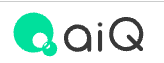

[disclaimer](../../disclaimer.txt/)

# ALTERNATIVE DATA Evaluation Demo

## Evaluate aiQ POS Elec Goods using aiQ Lab Alt Data Evaluation Tool

### Step1: Import Library

In [1]:
import os
import numpy as np
import pandas as pd

from aiq_strategy_robot.data.data_accessor import DAL
from aiq_strategy_robot.data.ALTERNATIVE import load_alternative_aiq_pos_elec_goods_universe, \
                                                    load_alternative_aiq_pos_elec_goods_data

In [2]:
ENV_DATABSE = 'TRIAL_SNOWFLAKE_DATABASE_AIQ_POS_ELEC_GOODS'
db_name = os.environ.get(ENV_DATABSE)

## Step2: Define Universe from Alt Data
### Normally, a list of tickers is picked by users.
### However it is made equal to the list of tickers found in aiQ POS Elec Goods dataset for this demo.

### `load_alternative_aiq_pos_elec_goods_universe`  

In [3]:
sdh = DAL()
load_alternative_aiq_pos_elec_goods_universe(sdh, ticker = '2180', db_name=db_name).retrieve()

,FIGI,TICKER
0,BBG000BN4FT7,2180


### Data Access handler load
Load the data to memory

same return as **load_alternative_aiq_pos_elec_goods_universe** 
```
load_alternative_aiq_pos_elec_goods_universe(sdh, ticker = '2180').retrieve()
```

In [4]:
sdh = sdh.load(
    'ALTERNATIVE',
    data_type='aiq_pos_elec_goods',
    meta_data='universe',
    ticker = ['2180'], 
    db_name=db_name
)
dfsyms = sdh.retrieve()
dfsyms

,FIGI,TICKER
0,BBG000BN4FT7,2180


## Get list of FIGI ids

In [5]:
aiq_pos_universe = load_alternative_aiq_pos_elec_goods_universe(sdh, db_name=db_name).retrieve()
list_figis = aiq_pos_universe['FIGI'].to_list()


## Step3: Load Alternative Data
### `load_alternative_aiq_pos_elec_goods_data`  
ALTERNATIVE DATA  aiq_pos_elec_goods data wrapper  


In [6]:
sdh = load_alternative_aiq_pos_elec_goods_data(
        sdh,
        figi=list_figis,
        variable = ['pos_sales', 'share', 'unit_price'],
        load_only_raw=True,
        load_only_latest=True, 
        db_name=db_name
    )
df_pos = sdh.retrieve()
df_pos.head()

,TICKER,FIGI,DATETIME,VARIABLE,SMOOTH,VALUE,BACKFILL,RELEASE_TIMESTAMP
0,2180,BBG000BN4FT7,2018-04-24,pos_sales,0,0.007863,1,2018-04-27 08:00:00
1,2180,BBG000BN4FT7,2018-04-24,share,0,0.000200,1,2018-04-27 08:00:00
2,2180,BBG000BN4FT7,2018-04-24,unit_price,0,1.000000,1,2018-04-27 08:00:00
3,2180,BBG000BN4FT7,2018-05-01,pos_sales,0,0.003931,1,2018-05-08 08:00:00
4,2180,BBG000BN4FT7,2018-05-01,share,0,0.000065,1,2018-05-08 08:00:00


### Data Access handler load
Load the data to memory

same return as **load_alternative_aiq_pos_elec_goods_data**
```
sdh = load_alternative_aiq_pos_elec_goods_data(
        sdh,
        figi=list_figis,
        load_only_raw=True,
        load_only_latest=True
    )
```

In [7]:
sdh = sdh.load(
    'ALTERNATIVE',
    data_type='aiq_pos_elec_goods',
    meta_data='data',
    figi=list_figis,
    variable = ['pos_sales', 'share', 'unit_price'],
    load_only_raw=True,
    load_only_latest=True, 
    db_name=db_name
)
df_pos = sdh.retrieve()
df_pos.head()

,TICKER,FIGI,DATETIME,VARIABLE,SMOOTH,VALUE,BACKFILL,RELEASE_TIMESTAMP
0,2180,BBG000BN4FT7,2018-04-24,pos_sales,0,0.007863,1,2018-04-27 08:00:00
1,2180,BBG000BN4FT7,2018-04-24,share,0,0.000200,1,2018-04-27 08:00:00
2,2180,BBG000BN4FT7,2018-04-24,unit_price,0,1.000000,1,2018-04-27 08:00:00
3,2180,BBG000BN4FT7,2018-05-01,pos_sales,0,0.003931,1,2018-05-08 08:00:00
4,2180,BBG000BN4FT7,2018-05-01,share,0,0.000065,1,2018-05-08 08:00:00


#### Appendix
The database and data schema used can be changed according to the user's environment.<br>
The following is how to specify this in `load_alternative_aiq_pos_elec_goods_data`, but the same applies to `load_alternative_aiq_pos_elec_goods_universe`.
```
sdh = load_alternative_aiq_pos_elec_goods_data(
        sdh,
        figi=list_figis,
        load_only_raw=True,
        load_only_latest=True,
        db_name='YOUR_DB_NAME',
        schema_name='YOUR_SCHEMA_NAME'
    )
```